In [ ]:
#ESS survey

In [73]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
media = pd.read_csv("data/ESS1-7e01.csv")

In [ ]:
media.head()

In [ ]:
media.tail()

In [ ]:
media.shape

In [220]:
labels = ["cntry", "essround", "tvtot", "tvpol", "rdtot", "rdpol", "nwsptot", "nwsppol", "netuse", "ppltrst", "pplfair", "pplhlp"]
media.loc[10000:10005, labels]

,cntry,essround,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,ppltrst,pplfair,pplhlp
10000,DE,4,3,1,2.0,1.0,1.0,1.0,5.0,3,4,7
10001,DE,4,2,1,2.0,1.0,0.0,66.0,4.0,6,7,7
10002,DE,4,6,1,0.0,66.0,1.0,1.0,0.0,3,4,4
10003,DE,4,4,2,7.0,1.0,1.0,1.0,6.0,7,7,7
10004,DE,4,6,4,7.0,7.0,1.0,1.0,1.0,2,3,1
10005,DE,4,3,1,6.0,1.0,1.0,1.0,7.0,2,4,4


In [ ]:
media.loc[media["cntry"]=="DE", labels].shape

In [223]:
plt.style.use("fivethirtyeight")

In [ ]:
tv = media.loc[:, "tvtot"]
nwsp = media.loc[:, "nwsptot"]

In [ ]:
plt.scatter(tv, nwsp, alpha=0.1)

In [ ]:
### round 6 only
media6 = media[media["essround"]==6]

In [ ]:
media6.shape

In [ ]:
tvtot6 = media6["tvtot"]
tvpol6 = media6["tvpol"]

In [ ]:
plt.scatter(tvtot6, tvpol6, alpha=0.05)

In [ ]:
countries = media["cntry"].unique()
def color(cntry):
    clrs = []
    clist = countries.tolist()
    return clist.index(cntry)

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'y']

In [98]:
def jitter(x, mu, sigma):
    return x + sigma*np.random.randn(len(x)) + mu

In [172]:
def explore(cntry, fld1, fld2, alpha=0.01, color='y'):
    data = media[media.cntry == cntry]
    if fld1 not in labels or fld2 not in labels:
        raise ValueError("Incorrect field name")
    fig, ax = plt.subplots()
    # ax.set_xlim([-1, 11])
    # ax.set_ylim([-1, 11])
    ax.set_title(f"Graph of {fld2} vs {fld1} for {cntry}")
    ax.set_xlabel(fld1)
    ax.set_ylabel(fld2)
    x = jitter(data[fld1], 0.0, 0.05)
    y = jitter(data[fld2], 0.0, 0.05)
    plt.axis([-0.5, 11, -0.5, 11])
    plt.scatter(x, y, alpha=alpha, color=color)
    plt.show()

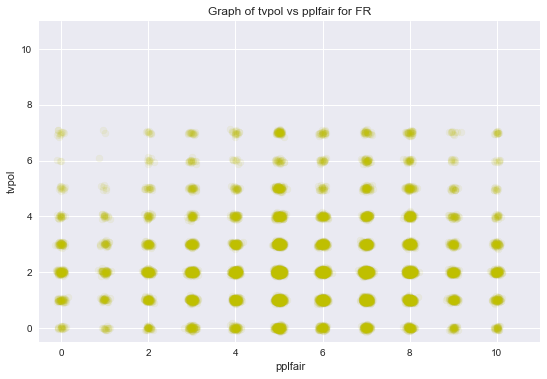

In [215]:
explore("FR", "pplfair", "tvpol", alpha=0.08)

In [202]:
def explore2(fld1, fld2, alpha=0.01, color='y'):
    if fld1 not in labels or fld2 not in labels:
        raise ValueError("Incorrect field name")
    cntrys = ["DE", "FR", "GB", "IT"]
    fig = plt.figure()
    subplot_num = 0
    for cntry in cntrys:
        subplot_num += 1
        data = media[media.cntry == cntry]
        ax = fig.add_subplot(2, 2, subplot_num)
        ax.set_xlim([-1, 11])
        ax.set_ylim([-1, 11])
        ax.set_title(f"Graph of {fld2} vs {fld1} for {cntry}")
        ax.set_xlabel(fld1)
        ax.set_ylabel(fld2)
        x = jitter(data[fld1], 0.0, 0.05)
        y = jitter(data[fld2], 0.0, 0.05)
        # plt.axis([-0.5, 11, -0.5, 11])
        ax.scatter(x, y, alpha=alpha, color=color)
    plt.show()

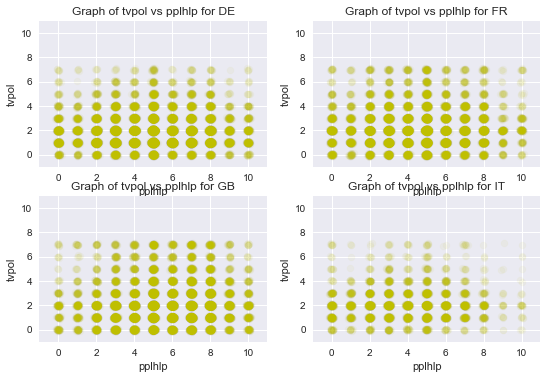

In [213]:
explore2("pplhlp", "tvpol", alpha=0.05)

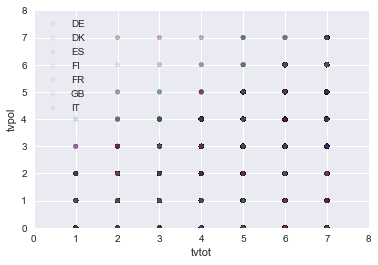

In [80]:
groups = media.groupby("cntry")
fig, ax = plt.subplots()
ax.set_xlim([0,8])
ax.set_ylim([0, 8])
for key, group in groups:
    # x = jitter(group.tvtot)
    # y = jitter(group.tvpol)
    group.plot(ax=ax, kind='scatter', x="tvtot", y="tvpol", label=key,
               color=colors, alpha=0.05)
plt.show()
    

In [ ]:
np.count_nonzero(media["nwsppol"])

In [ ]:
media["dweight"].unique().shape

In [ ]:
for key, group in groups:
    print(key, group[["tvtot", "tvpol"]].corr())

In [ ]:
for key, group in groups:
    print(key, group[["tvtot", "nwsptot"]].corr())

In [ ]:
for key, group in groups:
    print(key, group[["nwsptot", "nwsppol"]].corr())

In [ ]:
media.nwsptot.describe()

In [ ]:
for key, group in groups:
    print(key, group.nwsptot.value_counts())


In [ ]:
media_by_country = {key: group for key, group in groups}

In [ ]:
media_by_country["DE"].head()


## Trust

In [ ]:
def scatter_by_cntry(cntry, fld1, fld2):
    md = media_by_country[cntry]
    md = md[md[fld1] < 11]
    md = md[md[fld2] < 11]
    x = md[fld1]
    y = md[fld2]
    plt.scatter(x, y, alpha=0.005)    

In [ ]:
scatter_by_cntry("FR", "ppltrst", "nwsppol")

In [ ]:
media.ppltrst.value_counts()

In [ ]:
media_by_country["FR"].ppltrst.value_counts()

In [ ]:
def plt_trst(cntry):
    trust = media_by_country[cntry].ppltrst.value_counts()
    plt.bar(trust.index[trust.index<11], trust[trust.index<11])

In [ ]:
plt_trst("GB")

In [ ]:
media

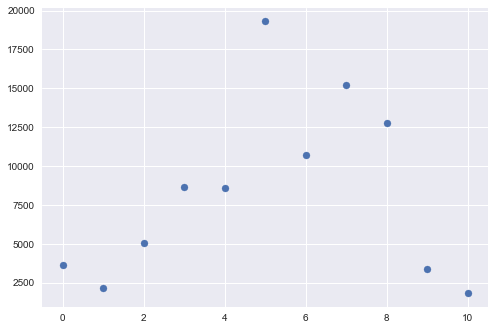

In [70]:
pt = media.ppltrst.value_counts()
plt.scatter(pt.index[pt.index < 11], pt[pt.index < 11])

In [ ]:
mcols = ['cntry', 'essround', 'dweight', 'pspwght', 'pweight', 'tvtot', 'tvpol',
       'rdtot', 'rdpol', 'nwsptot', 'nwsppol', 'netuse', 'ppltrst', 'pplfair',
       'pplhlp']

In [ ]:
media[mcols]

In [ ]:
media[media.netuse.notnull()]

In [ ]:
a = media[media.netuse.notnull()]
msk = (a.cntry == 'FR') & (a.essround == 5)
a[msk]


In [133]:
not "nwsptotx" in labels and "nwsppol" in labels

True

(array([ 2348.,  2341.,  5882., 10051., 10204., 20493., 12041., 13814.,
         9851.,  4162.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

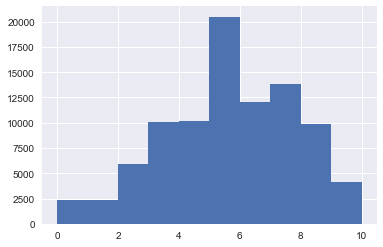

In [149]:
plt.hist(media.pplhlp[media.pplhlp < 11], bins=10)

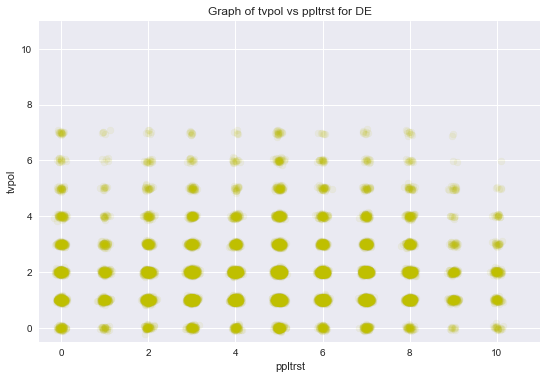

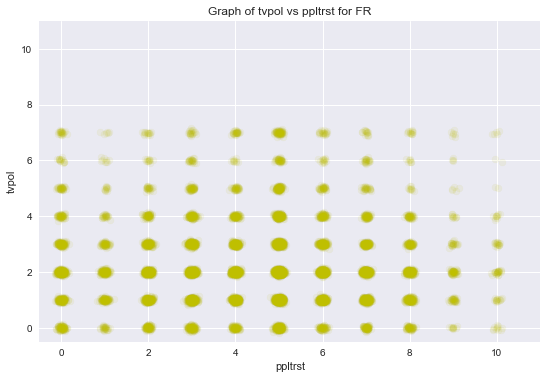

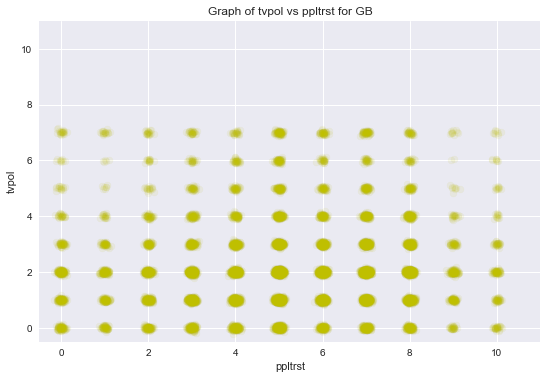

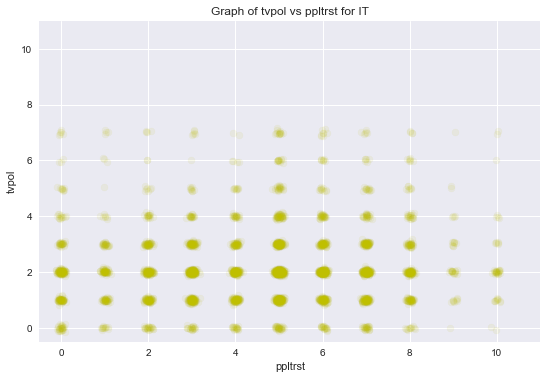

In [221]:
for cntry in ["DE", "FR", "GB", "IT"]:
    explore(cntry, "ppltrst", "tvpol", alpha=0.08)

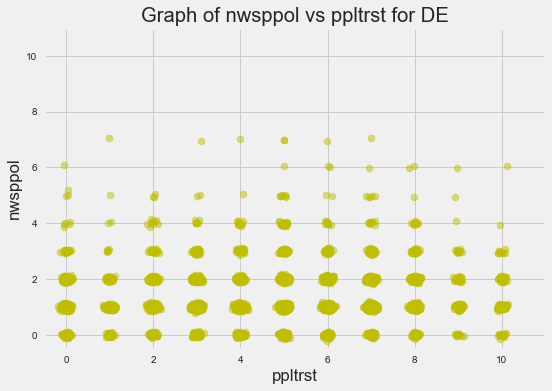

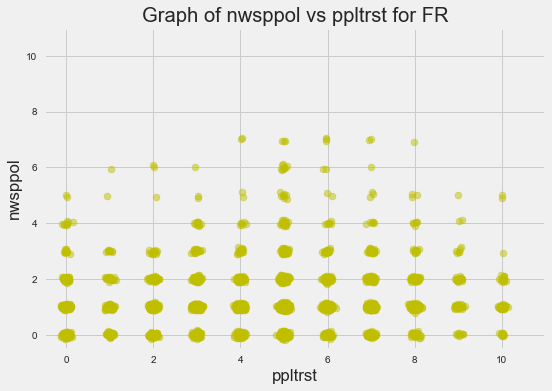

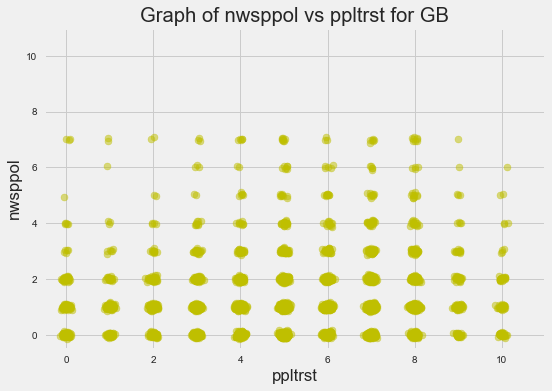

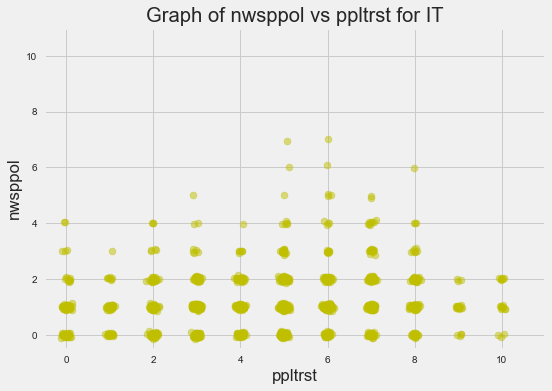

In [227]:
for cntry in ["DE", "FR", "GB", "IT"]:
    explore(cntry, "ppltrst", "nwsppol", alpha=0.5)